In [2]:
!pip uninstall -y jax jaxlib
!pip install -q tensorflow
from google.colab import files
files.upload()

Found existing installation: jax 0.5.2
Uninstalling jax-0.5.2:
  Successfully uninstalled jax-0.5.2
Found existing installation: jaxlib 0.5.1
Uninstalling jaxlib-0.5.1:
  Successfully uninstalled jaxlib-0.5.1


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"bankai0","key":"7fa2ded544e6067e1f18ab12a74ec0f3"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d masud1901/alzheimers-synthesized-dataset
!unzip -q alzheimers-synthesized-dataset.zip -d dataset

Dataset URL: https://www.kaggle.com/datasets/masud1901/alzheimers-synthesized-dataset
License(s): apache-2.0
 93% 441M/472M [00:01<00:00, 379MB/s]
100% 472M/472M [00:01<00:00, 342MB/s]


In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import os

In [5]:
train_dir = 'dataset/dataset/normal_dataset'
img_size = (128, 128)
batch_size = 32

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_data = datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_data = datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 6400 images belonging to 4 classes.
Found 1600 images belonging to 4 classes.


In [6]:
model = Sequential([
Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
MaxPooling2D(2, 2),
Conv2D(64, (3, 3), activation='relu'),
MaxPooling2D(2, 2),
Flatten(),
Dense(128, activation='relu'),
Dropout(0.3),
Dense(4, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_data, validation_data=val_data, epochs=12)
model.save("alzheimers_classifier_model.h5")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.3571 - loss: 1.4528

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


200/200 ━━━━━━━━━━━━━━━━━━━━ 13s 40ms/step - accuracy: 0.3575 - loss: 1.4515 - val_accuracy: 0.5756 - val_loss: 0.8894
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - accuracy: 0.6324 - loss: 0.8314 - val_accuracy: 0.6931 - val_loss: 0.6929
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - accuracy: 0.7224 - loss: 0.6340 - val_accuracy: 0.7275 - val_loss: 0.6362
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.8026 - loss: 0.4934 - val_accuracy: 0.7538 - val_loss: 0.5802
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.8415 - loss: 0.3852 - val_accuracy: 0.7738 - val_loss: 0.5425
Epoch 6/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.8774 - loss: 0.2984 - val_accuracy: 0.7775 - val_loss: 0.5930
Epoch 7/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - accuracy: 0.9228 - loss: 0.2085 - val_accuracy: 0.7875 - val_loss: 0.5687
Epoch 8/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.9466 - loss: 0.1504 - val_accuracy: 0.78

Saving unnamed-e1711737394216-378x378.jpg to unnamed-e1711737394216-378x378.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step


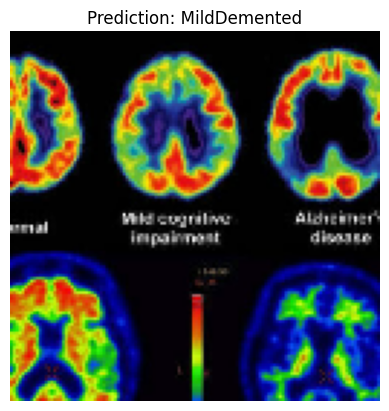

In [7]:
class_names = list(train_data.class_indices.keys())

def predict_image(img_path):
    img = image.load_img(img_path, target_size=img_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    prediction = model.predict(img_array)[0]
    predicted_label = class_names[np.argmax(prediction)]

    plt.imshow(img)
    plt.title(f"Prediction: {predicted_label}")
    plt.axis('off')
    plt.show()
from google.colab import files
uploaded = files.upload()

for img_name in uploaded.keys():
    predict_image(img_name)